In [1]:
# from https://data36.com/plot-histogram-python-pandas/

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
import csv

ctf_dump_file = "irmin.ctf.dump"

In [2]:
# maintain a dict, mapping allocation size to number of allocs
allocs = dict()

# and a simple list of alloc sizes
xs = []

with open(ctf_dump_file) as csvfile:
    reader = csv.reader(csvfile, delimiter=' ')
    for row in reader:
        #print(', '.join(row))
        entry_type = row[0]
        if (entry_type == 'a' or entry_type == 'A'):
            sz = int(row[2])
            xs.append(int(sz))
            if sz in allocs:
                allocs[sz] = allocs[sz]+1
            else:
                allocs[sz] = 1

#print(allocs)
#print(xs)

In [3]:
#allocs.keys()
#allocs.values()
ys = np.array(list(allocs.items()))
ys

array([[      1,   45922],
       [      6,   20869],
       [     42,       6],
       [      4,   47027],
       [      5,   56687],
       [     50,       3],
       [      2,  290942],
       [      3,   67857],
       [     65,   22841],
       [     30,      19],
       [     22,      86],
       [      8,   11247],
       [     72,       4],
       [     31,       2],
       [     32,      96],
       [     17,      35],
       [      7,   18021],
       [     41,       8],
       [     28,   16004],
       [     64,      20],
       [     10,    2955],
       [   8202,     435],
       [    513,     387],
       [  32768,     470],
       [   1024,    1336],
       [ 131072,     135],
       [   8193,   71913],
       [     11,    4418],
       [      9,    1830],
       [    128,     237],
       [     33,      52],
       [     14,     176],
       [     15,     183],
       [     16,     247],
       [     13,    4192],
       [   4097,     209],
       [     44,       3],
 

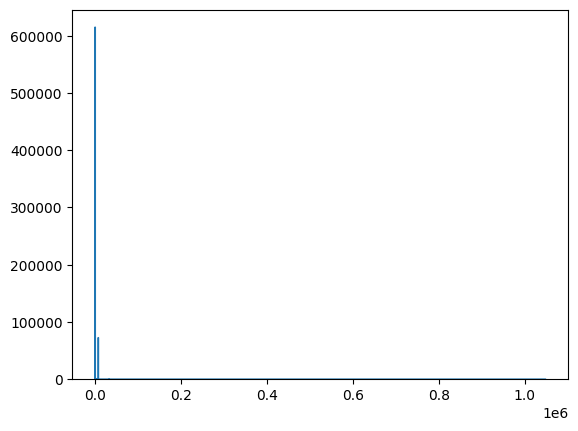

In [4]:
x = xs
counts, bins = np.histogram(x,1000)
plt.stairs(counts,bins)

In [5]:
counts

array([614955,   1096,     11,    371,      3,     11,     15,  72441,
           16,     15,     33,      1,      1,      2,      9,    146,
            3,      0,      1,      1,      3,      1,      2,      1,
            3,      0,      2,      4,      2,      1,      1,    543,
            2,      0,      0,      3,      1,      2,      2,      1,
            2,      0,      4,      0,      1,      2,      0,      1,
            4,      1,      3,      1,      4,      1,      1,      4,
            2,      0,      0,      0,      0,      0,     43,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [6]:
bins

array([1.00000000e+00, 1.04957500e+03, 2.09815000e+03, ...,
       1.04647885e+06, 1.04752743e+06, 1.04857600e+06])

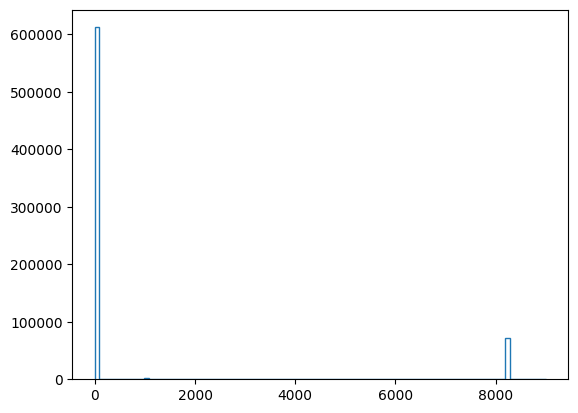

In [9]:
x=xs
counts, bins = np.histogram(x,range=(0,9000),bins=100)
plt.stairs(counts,bins)

In [10]:
# sum allocs.items; split into "small" vs "large" allocs
def compute_ratio_small_large(max_small_sz,allocs_grouped_by_size):
    allocs = allocs_grouped_by_size
    def is_small(sz): return sz <= max_small_sz
    total_small_allocs = sum([ v for (k,v) in allocs.items() if is_small(k) ])
    total_large_allocs = sum([ v for (k,v) in allocs.items() if not is_small(k) ])
    percentage_large = 100.0 * total_large_allocs / (total_small_allocs+total_large_allocs)
    total = total_small_allocs+total_large_allocs
    return { "total_small_allocs":total_small_allocs,
            "total_large_allocs": total_large_allocs,
            "total":total,
           "percentage_large": percentage_large}

x = compute_ratio_small_large(127,allocs)

print("Percentage large allocs of total: ", x["percentage_large"] , "(total is "+str(x["total"])+")")

# for max_small_sz = 127: Percentage large allocs of total:  11.271880303849427 (total is 689947)

Percentage large allocs of total:  11.271880303849427 (total is 689947)
